In [1]:
import pandas as pd
import numpy as np
import datatable as dt
import matplotlib.pyplot as plt
# from plotnine import *
import seaborn as sns

In [2]:
Data = dt.fread("Response Data.csv").to_pandas()

In [3]:
def to_string(var) :
    global Data 
    Data[var] = Data[var].astype(str)

to_string("Weather_Conditions")
to_string("Road_Surface_Conditions")
to_string("Special_Conditions_at_Site")
to_string("Carriageway_Hazards")
to_string("Pedestrian_Road_Maintenance_Worker")
to_string("Casualty_Home_Area_Type")
to_string("Skidding_and_Overturning")
to_string("Hit_Object_in_Carriageway")
to_string("Vehicle_Leaving_Carriageway")
to_string("Hit_Object_off_Carriageway")
to_string("Was_Vehicle_Left_Hand_Drive?")
to_string("Propulsion_Code")
to_string("Driver_IMD_Decile")
to_string("Driver_Home_Area_Type")
to_string("Diff_ASCS")

In [4]:
Data.select_dtypes(include = ["object"]).apply(lambda x : len(x.value_counts()))

Accident_Index                                 1780653
Police_Force                                        51
Accident_Severity                                    3
Date                                              4017
Day_of_Week                                          7
Time                                              1440
Local_Authority_(District)                         416
Local_Authority_(Highway)                          207
1st_Road_Class                                       6
Road_Type                                            6
Junction_Detail                                     10
Junction_Control                                     6
2nd_Road_Class                                       7
Pedestrian_Crossing-Human_Control                    4
Pedestrian_Crossing-Physical_Facilities              7
Light_Conditions                                     5
Weather_Conditions                                  10
Road_Surface_Conditions                              6
Special_Co

In [5]:
pd.options.display.float_format = "{:.2f}".format
Data.describe(include = ["float", "int"])

,1st_Road_Number,2nd_Road_Number,Age_of_Casualty,Car_Passenger,Bus_or_Coach_Passenger,Towing_and_Articulation,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle
count,2402907.00,2380211.00,2353995.00,2402129.00,2402846.00,2402663.00,2308445.00,1807804.00,1735458.00
mean,1015.73,382.93,35.23,0.28,0.09,0.02,37.75,1767.12,7.44
std,1826.69,1305.67,18.37,0.59,0.56,0.23,16.06,1486.62,4.61
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,0.00,0.00,21.00,0.00,0.00,0.00,24.00,1242.00,4.00
50%,134.00,0.00,32.00,0.00,0.00,0.00,35.00,1590.00,7.00
75%,724.00,0.00,47.00,0.00,0.00,0.00,48.00,1956.00,10.00
max,9999.00,9999.00,104.00,2.00,4.00,5.00,100.00,99999.00,111.00


In [6]:
Data.Diff_ASCS.value_counts()
# 1      95045
# 2      11060

0    2296804
1      95045
2      11060
Name: Diff_ASCS, dtype: int64

In [49]:
def PLOT(var) :
    global Data
    Data[var].value_counts().sort_values().plot.barh()

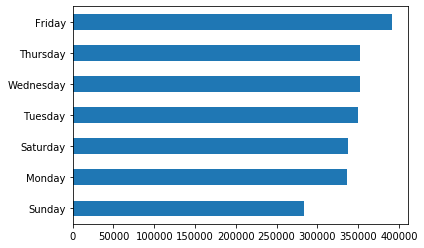

In [50]:
PLOT("Day_of_Week")
## Friday is the most dangerous day in UK. 

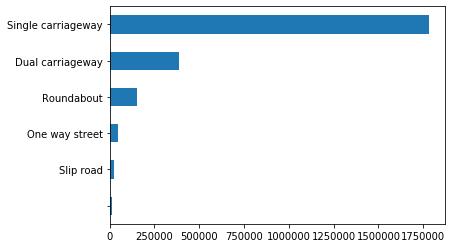

In [51]:
PLOT("Road_Type")
# Single Carriageway 雙向車道（中間無分隔島）
# Dual Carriageway 雙向車道（中間有分隔島）
# Roundabout 圓環 Slip Road 岔路、支道

## 雙向車道（中間無分隔島）最容易出事

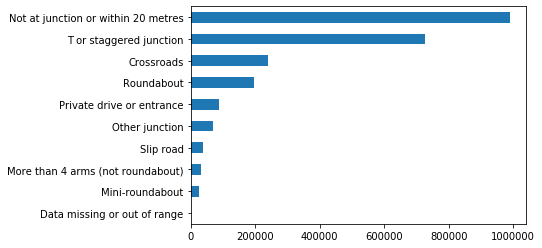

In [52]:
PLOT("Junction_Detail")
# Staggered junction 交錯路口

## 結果路口處不是發生意外最多的地方而是道路上

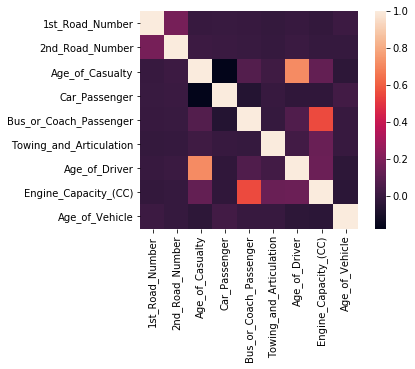

In [15]:
sns.heatmap(Data.select_dtypes(include = ["float", "int"]).corr(), 
             square = True)
## Age_of_Casualty & Age_of_Driver high high corr (0.8)
## Bus_or_Coach_Passenger & Engine_Capavity_(CC) high corr (0.6)

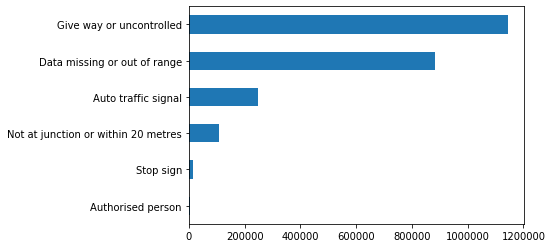

In [17]:
PLOT("Junction_Control")
# Give way讓路
# 沒有交通號誌的地方最容易出事

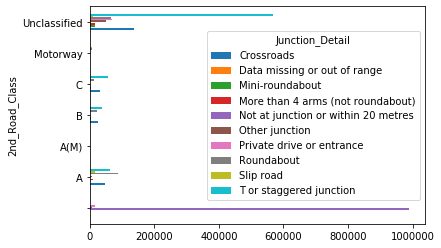

In [31]:
Data.groupby(["2nd_Road_Class"])["Junction_Detail"].value_counts().unstack().plot.barh()
## 沒有Second Road 代表只有一條路
## Unclassified 我猜是staggered junction

In [60]:
Data["Pedestrian_Crossing-Human_Control"].value_counts()
## 確認每一類別是否與LuckyOrNot是否高度相關
## Pedestrian_Crossing-Human_Control 可以刪掉

None within 50 metres                 2389601
Control by other authorised person       7844
Control by school crossing patrol        5274
Data missing or out of range              190
Name: Pedestrian_Crossing-Human_Control, dtype: int64

In [34]:
Data["Pedestrian_Crossing-Physical_Facilities"].value_counts()
## Pedestrian 要處理values

No physical crossing facilities within 50 metres                             2022536
Pedestrian phase at traffic signal junction                                   155467
Pelican, puffin, toucan or similar non-junction pedestrian light crossing     118088
Zebra                                                                          56877
Central refuge                                                                 42816
Footbridge or subway                                                            6922
Data missing or out of range                                                     203
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64

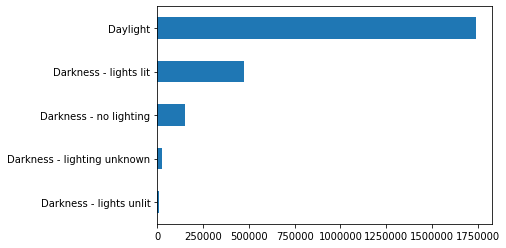

In [53]:
PLOT("Light_Conditions")
## Daylight才是最多車禍發生的地方

In [41]:
Data["Urban_or_Rural_Area"].value_counts()

Urban          1465682
Rural           937036
Unallocated        191
Name: Urban_or_Rural_Area, dtype: int64

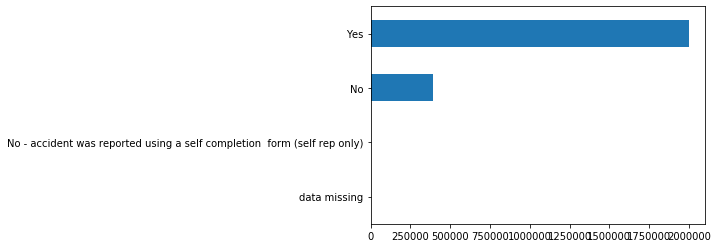

In [54]:
PLOT("Did_Police_Officer_Attend_Scene_of_Accident")
## Check correlation between LuckyOrNot with No - accident was reported...
## No - accident was reported... combine into "No"

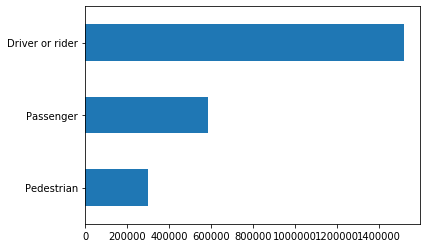

In [55]:
PLOT("Casualty_Class")
## 駕駛才是最衰的那個 

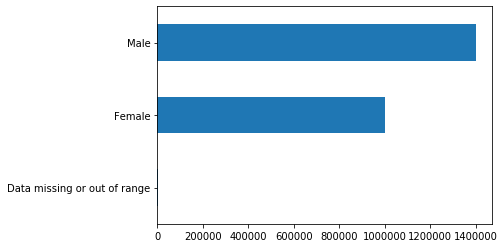

In [56]:
PLOT("Sex_of_Casualty")
# Male >> Female >> Missing

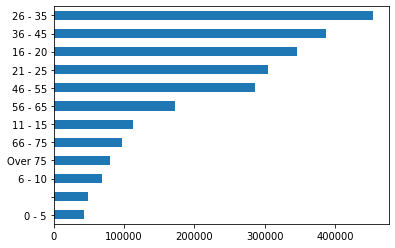

In [57]:
PLOT("Age_Band_of_Casualty")
## 青年 >> 壯年 >> 年輕人 >> 中年 >> 小孩 >> 老人 >> 嬰幼兒
## 考慮一下比例:每個年齡層裡面，可以受到較輕的傷的比例！

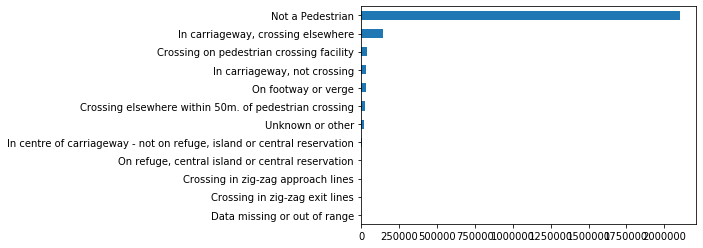

In [58]:
PLOT("Pedestrian_Location")
# 幾乎都是車撞車，看看有沒有類別與LuckyOrNot高度相關決定怎麼處理

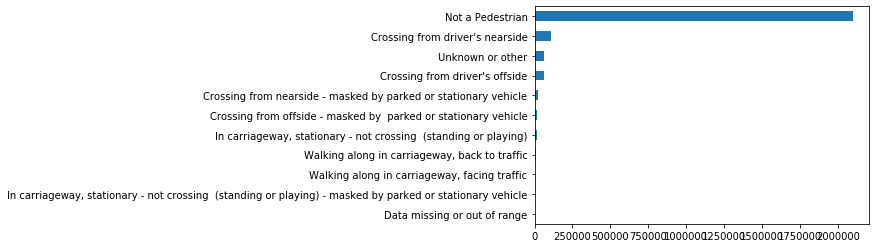

In [59]:
PLOT("Pedestrian_Movement")
# 與pedestrian_Location大致上重複，但還是確認一下已沒有有用特徵

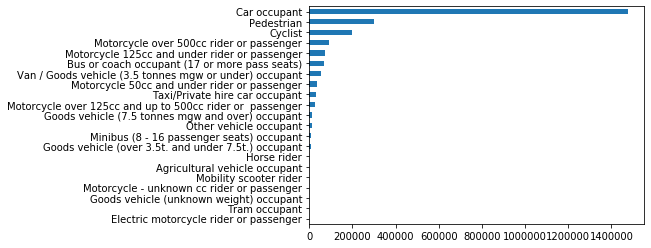

In [63]:
PLOT("Casualty_Type")
## Car occupant佔大多數， 一樣要檢測與LON相關性

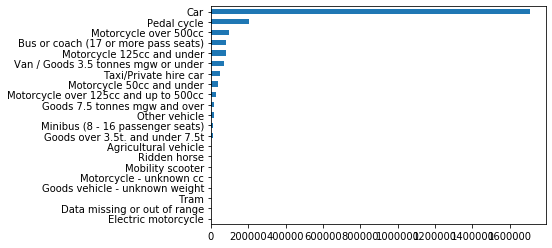

In [65]:
PLOT("Vehicle_Type")
# 整理成 Car Pedal Cycle Motorcycle Bus Others

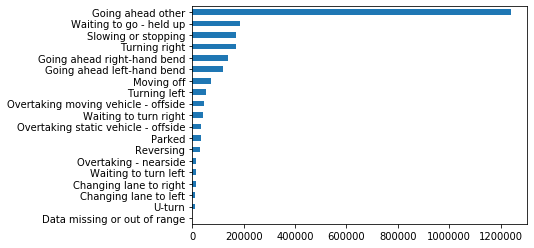

In [71]:
PLOT("Vehicle_Manoeuvre")
# Vehicle 狀態？
## 往前開中最多 （廢話？  |  一樣整理

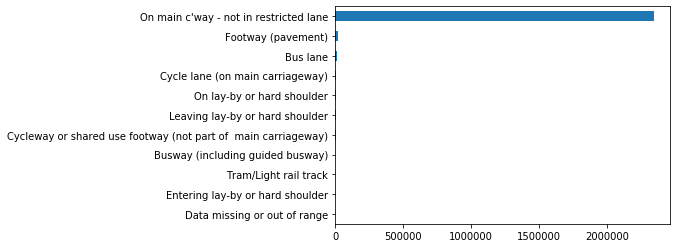

In [72]:
PLOT("Vehicle_Location-Restricted_Lane")
# 檢測與LON相關性 低的話砍掉

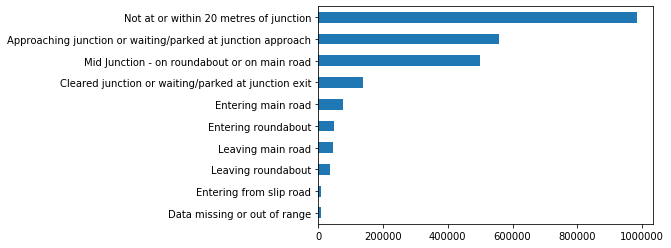

In [73]:
PLOT("Junction_Location")
## 我覺得 算一下與Junction_Detail 還有 LON 的比例

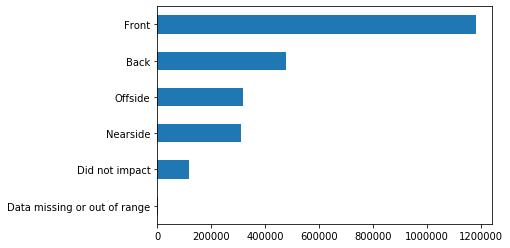

In [77]:
PLOT("1st_Point_of_Impact")
## 這個直接與LON比較 總覺得會是很重要的變數

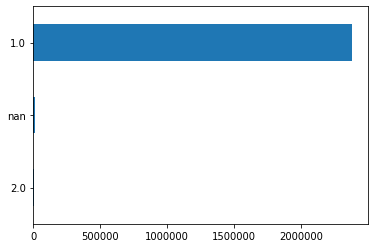

In [78]:
PLOT("Was_Vehicle_Left_Hand_Drive?")
## 一樣檢測與LON有關 沒關的話直接砍

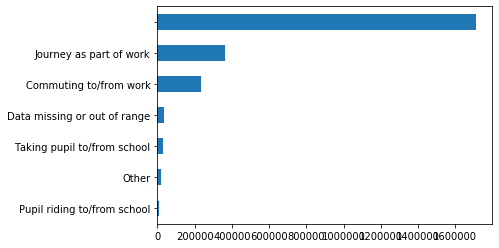

In [79]:
PLOT("Journey_Purpose_of_Driver")
## NA 最多... ～～ 應該可以留著

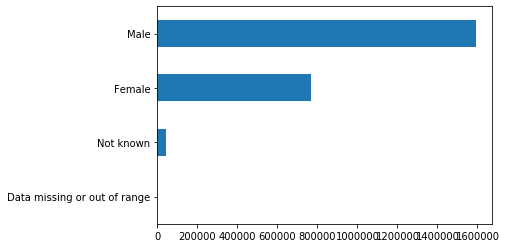

In [80]:
PLOT("Sex_of_Driver")
## 看一下比例吧男生中Lucky的比例！

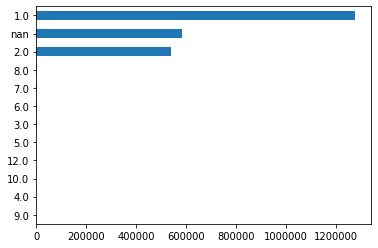

In [82]:
PLOT("Propulsion_Code")
## https://www.sciencedirect.com/topics/computer-science/propulsion-system  查一下ㄅ 